In [591]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [592]:
x_train = pd.read_csv('gaussian_process/X_train.csv',header=None)
x_test = pd.read_csv('gaussian_process/X_test.csv',header=None)
y_train = pd.read_csv('gaussian_process/y_train.csv',header=None)
y_test = pd.read_csv('gaussian_process/y_test.csv',header=None)

In [593]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [594]:
y_test = np.squeeze(np.asarray(y_test))
y_train = np.squeeze(np.asarray(y_train))

In [595]:
def kernel_function(x1,x2,b):
    answer = np.exp((-1*np.sum((x1-x2)**2))/b)
    return answer

In [596]:
def making_nn_kernel(b,x):
    x_train=x.copy()
    kernel_matrix = np.ones((x_train.shape[0],x_train.shape[0]))
    for i in range(x_train.shape[0]):
        for j in range(x_train.shape[0]):
            x1 = x_train[i,:]
            x2 = x_train[j,:]
            kernel_matrix[i,j] = kernel_function(x1,x2,b)
    return kernel_matrix

In [597]:
def prediction_gaussain(x0, b, x_train, y_train, sigma_square , kernel_matrix):
    x_train_new = x_train.copy()
    n = x_train_new.shape[0]
    identity = np.identity(n) * sigma_square
    kernel_x = x_train_new - x0
    kernel_x = np.multiply(kernel_x,kernel_x)
    kernel_x = np.sum(kernel_x,axis=1)
    kernel_x = np.array([ np.exp(-a/b) for a in kernel_x ])
    temp = identity + kernel_matrix
    temp = np.linalg.inv(temp)
    final = kernel_x.dot(temp)
    final = final.dot(y_train)
    return final
    

In [598]:
kernel_matrix = making_nn_kernel(5,x_train)

In [599]:
prediction_gaussain( x_test[3,:], 5 , x_train, y_train,0.1,kernel_matrix)

-6.0744533129940681

In [600]:
b_list=[5,7,9,11,13,15]
sigma_square_list=np.arange(0.1,1.1,0.1)

In [601]:
errors=[]
param1=[]
param2=[]
for b in b_list:
    kernel_matrix = making_nn_kernel(b,x_train)
    for sigma_square in sigma_square_list:
        predictions = np.apply_along_axis(prediction_gaussain,1,x_test,b,x_train,y_train,sigma_square,kernel_matrix)
        error = np.sqrt(np.sum((predictions-y_test)**2)/len(y_test))
        errors.append(error)
        param1.append(b)
        param2.append(sigma_square)
                        

In [602]:
results=pd.DataFrame({'b':param1,'sigma_sq':param2,'rmse':errors})

In [603]:
results.to_csv('table.csv')
results.sort_values(['rmse'],ascending=True)

,b,rmse,sigma_sq
30,11,1.890507,0.1
40,13,1.895849,0.1
20,9,1.897649,0.1
21,9,1.902519,0.2
11,7,1.904877,0.2
12,7,1.908080,0.3
50,15,1.909603,0.1
31,11,1.914981,0.2
13,7,1.915902,0.4
22,9,1.917648,0.3


In [604]:
b=5
sigma_square=2
x_train_new=x_train[:,3]
x_test_new=x_train[:,3]

kernel_matrix = np.ones((x_train_new.shape[0],x_train_new.shape[0]))
for i in range(x_train_new.shape[0]):
    for j in range(x_train_new.shape[0]):
        x1 = x_train_new[i]
        x2 = x_train_new[j]
        kernel_matrix[i,j] = kernel_function(x1,x2,b)



In [605]:
def prediction_gaussain_2(x0, b, x_train, y_train, sigma_square , kernel_matrix):
    x_train_new = x_train.copy()
    n = x_train_new.shape[0]
    identity = np.identity(n) * sigma_square
    kernel_x = x_train_new - x0
    kernel_x = kernel_x*kernel_x
    kernel_x = np.array([ np.exp(-a/b) for a in kernel_x ])
    temp = identity + kernel_matrix
    temp = np.linalg.inv(temp)
    final = kernel_x.dot(temp)
    final = final.dot(y_train)
    return final



In [606]:
predictions = [ prediction_gaussain_2(a,b,x_train_new,y_train,sigma_square,kernel_matrix) for a in x_train_new ]

In [607]:
new_df=pd.DataFrame({'train':x_train[:,3],'prediction':predictions})
mean_prediction=new_df.groupby('train')['prediction'].mean()

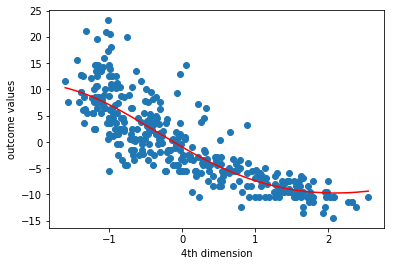

In [610]:
x4_dim=x_train[:,3]
out=y_train
plt.scatter(x4_dim,out)
plt.plot(mean_prediction.index,mean_prediction,'r')
plt.xlabel('4th dimension')
plt.ylabel('outcome values')
plt.show()

In [810]:
x_train = pd.read_csv('boosting/X_train.csv',header=None)
x_test = pd.read_csv('boosting/X_test.csv',header=None)
y_train = pd.read_csv('boosting/y_train.csv',header=None)
y_test = pd.read_csv('boosting/y_test.csv',header=None)

In [811]:
x_train = np.matrix(x_train)
x_test = np.matrix(x_test)
y_train = np.matrix(y_train)
y_test = np.matrix(y_test)

In [812]:
y_test = np.squeeze(np.asarray(y_test))
y_train = np.squeeze(np.asarray(y_train))

In [813]:
x_train = np.column_stack((x_train,np.ones(x_train.shape[0])))
x_test = np.column_stack((x_test,np.ones(x_test.shape[0])))

In [814]:
keys=list(range(1,x_train.shape[0]+1))
freq=[0 for i in range (x_train.shape[0])]
bootstrap_freq=dict(zip(keys,freq))

In [815]:
def create_bootsrtap_data(X_train,Y_train,w,freq_dict):
    
    x_train=X_train.copy()
    y_train=Y_train.copy()
    
    random_index=np.random.choice(x_train.shape[0],x_train.shape[0],replace=True,p=list(w))
    for a in random_index:
        freq_dict[a+1]=freq_dict[a+1]+1
    
    x_train=x_train[random_index,:]
    y_train=y_train[random_index]
    return (x_train,y_train)

In [816]:
def update_weights(aplha_t,predictions_t,actual_y,w):
    
    w_new=w.copy()
    sum_new=0
    for i in range(len(w_new)):
        w_new[i]=w_new[i]*np.exp(-1*aplha_t*actual_y[i]*predictions_t[i])
    
    sum_new=np.sum(w_new)
    w_new=w_new/sum_new
    return w_new

In [817]:
def create_classifier_t(X_train,Y_train):
    
    x_train=X_train.copy()
    y_train=Y_train.copy()
    
    x_transpose=x_train.transpose()
    temp=np.matmul(x_transpose,x_train)
    inverse = np.linalg.inv(temp)
    weights = np.matmul(np.matmul(inverse,x_transpose),y_train)
    
    return weights


In [818]:
weight_t=np.array([1/x_train.shape[0] for i in range((x_train.shape[0]))])
alpha_list=[]
et_list=[]
train_predict=[0 for i in range(x_train.shape[0])]
test_predict=[0 for i in range(x_test.shape[0])]
train_error=[]
test_error=[]

for i in range(1500):
    
    X_train,Y_train=create_bootsrtap_data(x_train,y_train,weight_t,bootstrap_freq)
    
    reg_weights=create_classifier_t(X_train,Y_train)
      
    train_predictions=np.squeeze(np.asarray(np.matmul(x_train,reg_weights.T)))
    test_predictions=np.squeeze(np.asarray(np.matmul(x_test,reg_weights.T)))
    
    train_predictions=np.sign(train_predictions)
    test_predictions=np.sign(test_predictions)
    
    temp=y_train!=train_predictions
    error_weight=weight_t*temp
    e_t=np.sum(error_weight)
    
    if (e_t>0.5):
        reg_weights=-1*reg_weights
        
        train_predictions=np.squeeze(np.asarray(np.matmul(x_train,reg_weights.T)))
        test_predictions=np.squeeze(np.asarray(np.matmul(x_test,reg_weights.T)))
        
        train_predictions=np.sign(train_predictions)
        test_predictions=np.sign(test_predictions)
        
        temp=y_train!=train_predictions
        error_weight=weight_t*temp
        e_t=np.sum(error_weight)

    
    et_list.append(e_t)
    alpha_t=0.5*math.log((1-e_t)/e_t)
    alpha_list.append(alpha_t)
    
    train_predict=(train_predict+alpha_t*train_predictions)
    test_predict=(test_predict+alpha_t*test_predictions)
    
    train_error.append(np.mean(np.sign(train_predict)!=y_train))
    test_error.append(np.mean(np.sign(test_predict)!=y_test))
   
    weight_t=update_weights(alpha_t,train_predictions,y_train,weight_t)

    

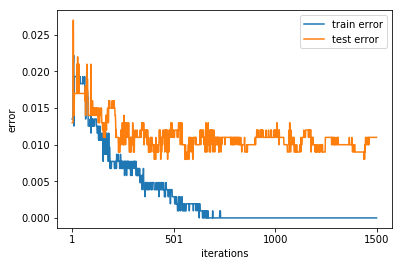

In [819]:
x=list(range(1500))
y=train_error
plt.plot(x,y)
xticks=np.linspace(1,1500,4)
plt.xticks(xticks)

y=test_error
plt.plot(x,y)
xticks=np.linspace(1,1500,4)
plt.xlabel('iterations')
plt.ylabel('error')
plt.legend(['train error','test error'])
plt.show()

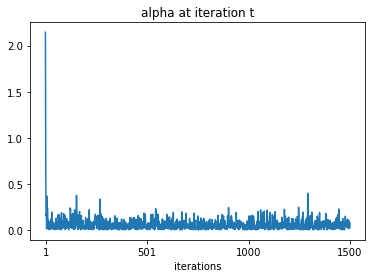

In [820]:
x=list(range(1500))
y=alpha_list
plt.plot(x,y)
plt.xlabel('iterations')
plt.title('alpha at iteration t')
xticks=np.linspace(1,1500,4)
plt.xticks(xticks)
plt.show()

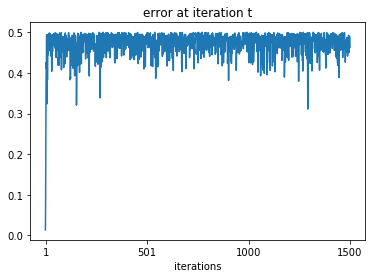

In [821]:
x=list(range(1500))
y=et_list
plt.plot(x,y)
plt.xlabel('iterations')
plt.title('error at iteration t')
xticks=np.linspace(1,1500,4)
plt.xticks(xticks)
plt.show()

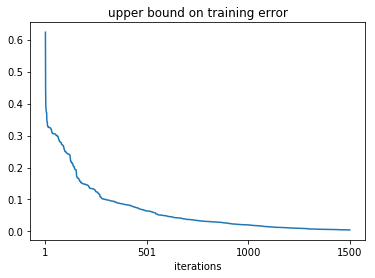

In [822]:
#upper bound for training error
var=0
upper_training=[]
for i in range(1500):
    var=var+(0.5-et_list[i])**2
    upper=np.exp(-2*var)
    upper_training.append(upper)
    
x=list(range(1,1501))
y=upper_training
plt.plot(x,y)
plt.xlabel('iterations')
plt.title('upper bound on training error')
xticks=np.linspace(1,1500,4)
plt.xticks(xticks)
plt.show()
    

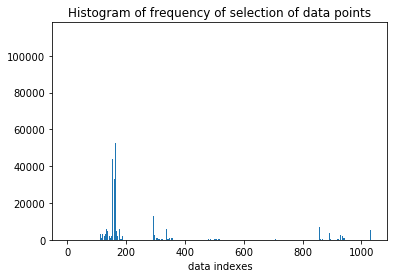

In [823]:
#plotting histogram for frequency
x=list(bootstrap_freq.keys())
y=list(bootstrap_freq.values())
plt.bar(x,y)
plt.xlabel('data indexes')
plt.title('Histogram of frequency of selection of data points')
plt.show()